# Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan.


The purpose of this project is to analyse whether the number of children that a borrower has affacts their ability to repay their loan causing them to default on the loan. I hypothesize that the more children that a borrower has the more likely they are to default on their bank loan.

# Contents <a id='back'></a>

* [Introduction](#intro)
* [Data exploration](#dataexplo)
* [Data transformation](#datatrans)
* [Working with missing values](#miss)
    * [Restoring missing values in 'total_income'](#miss1)
    * [Restoring values in `days_employed`](#days)
  [Categorization of data](#cat)
* [Checking the hypotheses](#hyp)
    * [Hypothesis 1: Is there a correlation between having children and paying back on time?](#h1)
    * [Hypothesis 2: Is there a correlation between family status and paying back on time?](#h2)
    * [Hypothesis 3: Is there a correlation between income level and paying back on time?](#h3)
    * [Hypothesis 4: How does credit purpose affect the default rate?](#h4)
* [General conclusion](#end)


## Open the data file and have a look at the general information. 


In [1]:
# Loading all the libraries
import pandas as pd

In [2]:
# Load the data
try:
    df_credit = pd.read_csv('C:/Users/Wandile/Documents/PracticumProjects/DataPreprocessing/credit_scoring_eng.csv')
except:
    df_credit = pd.read_csv('/datasets/credit_scoring_eng.csv')

## Task 1. Data exploration <div id='dataexplo'><div>

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan


In [3]:
# Let's see how many rows and columns our dataset has
display(df_credit)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [4]:
# let's print the first N rows
display(df_credit.head(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


There are negative values under the days_employed column.

In [5]:
# Get info on data
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


There are  missing values under the 'days_employed' and the 'total_income' column. These columns have less non-null values then the rest of the columns.

In [6]:
# Let's look in the filtered table at the the first column with missing data
original_data_with_out_missing_value = df_credit[~df_credit['total_income'].isna()==True]
display(original_data_with_out_missing_value)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [7]:
# Let's apply multiple conditions for filtering data and look at the number of rows in the filtered table.
original_data_with_out_missing_value = df_credit[~df_credit['days_employed'].isna()==True]
display(original_data_with_out_missing_value)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [8]:
df_credit.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


In [9]:
original_data_with_out_missing_value.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000,19351.000000
mean,0.537388,63046.497661,43.255336,0.819079,0.972249,0.081184,26787.568355
std,1.371408,140827.311974,12.579170,0.550104,1.420596,0.273125,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


**Intermediate conclusion**

The number of rows of unque values in the 'employed_days' column does not match the number of rows in the same column values. 
The data without missing values has the same distribution as the dataset with the missing values.


In [10]:
# Let's investigate clients who do not have data on identified characteristic and the column with the missing values

In [11]:
# Checking distribution
cat_col = ['education', 'gender', 'income_type']     
for col in cat_col:
    display(df_credit[col].value_counts(normalize=True))

education
secondary education    0.638792
bachelor's degree      0.219187
SECONDARY EDUCATION    0.035865
Secondary Education    0.033031
some college           0.031034
BACHELOR'S DEGREE      0.012729
Bachelor's Degree      0.012451
primary education      0.011614
Some College           0.002184
SOME COLLEGE           0.001347
PRIMARY EDUCATION      0.000790
Primary Education      0.000697
graduate degree        0.000186
Graduate Degree        0.000046
GRADUATE DEGREE        0.000046
Name: proportion, dtype: float64

gender
F      0.661370
M      0.338583
XNA    0.000046
Name: proportion, dtype: float64

income_type
employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
unemployed                     0.000093
entrepreneur                   0.000093
student                        0.000046
paternity / maternity leave    0.000046
Name: proportion, dtype: float64

In [12]:
df_credit[df_credit['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


The number of missing values in the 'days_employed' column and the 'total_income' are the same.

**Possible reasons for missing values in data**

The possible reason for these values missing is that these employees were not present when this information was asked of them to complete or the employees needed to verify this data but they did not leaving the entries as not known.

In [13]:
# Checking the distribution in the whole dataset
cat_col = ['education', 'gender', 'income_type']     
for col in cat_col:
    display(original_data_with_out_missing_value[col].value_counts(normalize=True))


education
secondary education    0.637796
bachelor's degree      0.218180
SECONDARY EDUCATION    0.036432
Secondary Education    0.033383
some college           0.031678
BACHELOR'S DEGREE      0.012971
Bachelor's Degree      0.012557
primary education      0.011937
Some College           0.002067
SOME COLLEGE           0.001137
PRIMARY EDUCATION      0.000827
Primary Education      0.000723
graduate degree        0.000207
Graduate Degree        0.000052
GRADUATE DEGREE        0.000052
Name: proportion, dtype: float64

gender
F      0.658984
M      0.340964
XNA    0.000052
Name: proportion, dtype: float64

income_type
employee                       0.517493
business                       0.236525
retiree                        0.177924
civil servant                  0.067800
unemployed                     0.000103
student                        0.000052
entrepreneur                   0.000052
paternity / maternity leave    0.000052
Name: proportion, dtype: float64

**Intermediate conclusion**

We can conclude that the missing values are completely random as there are 19351 different types of values. This is roughly 90% of the total values in the data set. The missing values account for roughly 10% of the total data set. We can also conclude that the missing values are also not symmetric. However, the 'days_employed' column and the 'total_income' column both have missing values in the same rows.

The 'days_employed' column is not dependent on any of the other columns as the worker with three children can work the same days, earn the same amount or have the same level of education as a person with no children or one child.

There is a very minor difference between the frequency of the other columns of the dataset with and without missing values.


**Intermediate conclusion**

We can conclude that he missing values are compelety random and that they do not affact the dataset when they are removed.

**Conclusions**

There are no patterns to the missing values. I came to this conclusion because not all the values in a row are missing. The missing values in the 'days_employed' column and the 'total_income' column correspond indicating that there might be an error in the data capturing processes. The some of the days_employed values are negative. These values are randomly negative. As the mean is a positive number. 

Since the missing values are roughly 10% of the data set and they do not affact the data set when they are removed they can be replaced by the number 0.

For the data transformation process, the missing values have to be replaced with zeros, the 'days_employed' column has to be made positive and an integer value. Lastly, the purpose column can be simplified with just short words so that they can be categorized.

## Data transformation <div id='datatrans'></div>

Below the education column data is simplified removing the data entries that are the same but entered in different form causing a form of duplication.

In [14]:
# Let's see all values in education column to check if and what spellings will need to be fixed
df_credit['education'].value_counts()

education
secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: count, dtype: int64

In [15]:
# Fix the registers if required
df_credit['education'] = df_credit['education'].str.lower()


In [16]:
# Checking all the values in the column to make sure we fixed them
df_credit['education'].value_counts()


education
secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: count, dtype: int64

In [17]:
df_credit['education_id'].value_counts()

education_id
1    15233
0     5260
2      744
3      282
4        6
Name: count, dtype: int64


Below the children column is checked of any errors or inaccuracies. 

count    21525.000000
mean         0.538908
std          1.381587
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64

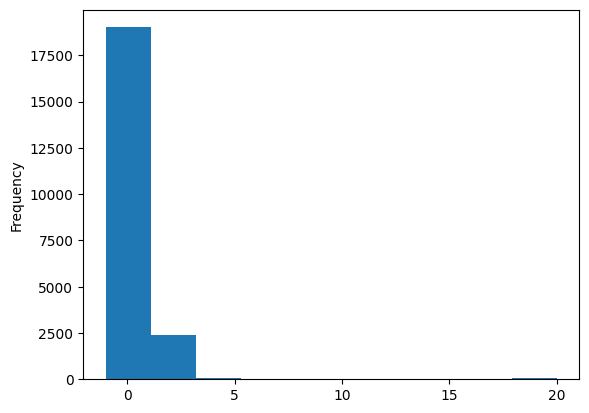

In [18]:
# Let's see the distribution of values in the `children` column
df_credit['children'].plot(kind='hist')
df_credit['children'].describe()

In [19]:
percentage = df_credit['children'].loc[df_credit['children']==-1].count()/len(df_credit['children'].index)*100
print(f'{percentage}%')

0.2183507549361208%


There are negative numbers in the 'children' column. This error could have occcured through incorrect data entry or error sorting the data. I will change the negative values to positive integers because all the values are integers and there shouldn't be as a person cannot have a negative child.

In [20]:
# [fix the data based on your decision]
df_credit['children'] = df_credit['children'].abs()

In [21]:
display(df_credit['children'].value_counts())

children
0     14149
1      4865
2      2055
3       330
20       76
4        41
5         9
Name: count, dtype: int64

In [22]:
df_credit['children'] = df_credit['children'].replace(20,2)

There are clients that have more than 20 children.This seems unlikely and could be an error in the data as 20 children is an outlier from the number of children that clients could have. The maximum number of children that clients have is 5 according to the dataset. Clients with 20 children is less than 1% of the dataset however 20 could be 2 and maybe an entry error had occured during entry.

count    21525.000000
mean         0.479721
std          0.755528
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: children, dtype: float64

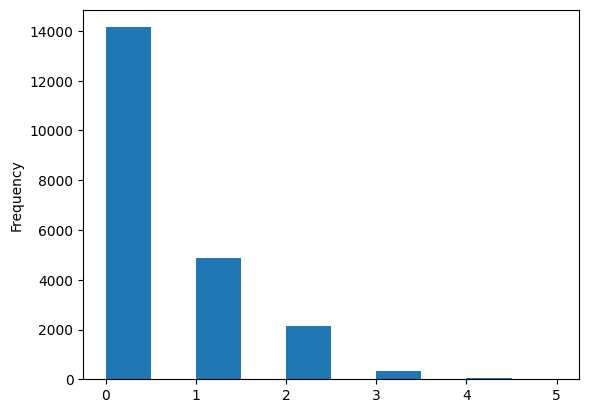

In [23]:
# Checking the `children` column again to make sure it's all fixed
df_credit['children'].plot(kind='hist')
df_credit['children'].describe()

Below the 'days_employed' column is checked for any error or inaccrate data.

In [24]:
# Find problematic data in `days_employed`, if they exist, and calculate the percentage
percentage_error = (df_credit['days_employed'].loc[df_credit['days_employed']<0]).count()/len(df_credit['days_employed'].index)*100
print(f'{percentage_error}%')

73.89547038327527%


The 'days_employed' column has negative float values. This incorrect data consist of roughly 74% of the dataset. This error could have occured during the conversion of employee hours to days. The correct data should have positive integer values.

In [25]:
#convert negative to positive.
df_credit['days_employed'] = df_credit['days_employed'].abs()
df_credit['years_employed'] = df_credit['days_employed']/365

# extract all values where the years_employed is greater that Age
abnormal_hrs = df_credit.loc[df_credit.years_employed > df_credit.dob_years, 'days_employed']

# Convert this values to days by dividing it by 24
df_credit.loc[df_credit.years_employed > df_credit.dob_years, 'days_employed'] = abnormal_hrs/24

There are some values that do not make sense in the 'days_employed' column. It is impossible to work 401755 days in ones lifetime, because that is over a 1000 years. The maximum number of days is 20000 which is 55 years. This is possible as there are clients on the dataset that are 73 or 72 implying they worked from the age of 18. The data with extremely high working days needs to be removed because it will distort the data for analysis. 

0.0%


<Axes: >

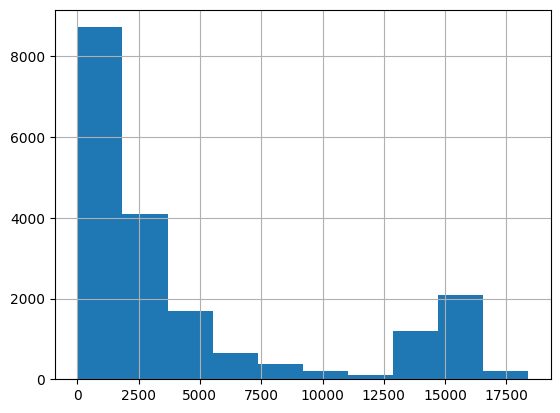

In [26]:
# Check the result - make sure it's fixed
percentage_error = (df_credit['days_employed'].loc[df_credit['days_employed']<0].count())/len(df_credit['days_employed'].index)*100
print(f'{percentage_error}%')
df_credit['days_employed'].hist()

Below the age column of the data set is checked for errors or inaccuracies.

In [27]:
# Check the `dob_years` for suspicious values and count the percentage
df_credit['dob_years'].value_counts()


dob_years
35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
22    183
66    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: count, dtype: int64

In [28]:
percentage_error_age = df_credit['dob_years'].loc[df_credit['dob_years']<18].count()/df_credit['dob_years'].count()*100
print(f'{percentage_error_age}%')

0.4692218350754936%


In [29]:
median_age = df_credit['dob_years'].median()
df_credit['dob_years'] = df_credit['dob_years'].replace(0,median_age)

In [30]:
percentage_error_age = df_credit['dob_years'].loc[df_credit['dob_years']<18].count()/df_credit['dob_years'].count()*100
print(f'{percentage_error_age}%')

0.0%


The problem values in the data set is that there are records with the age 0. This can not happened as it is impossible to have the age of zero and be working. However these records are less than 1% of the data set and already have 0 as a default value so these records will be left as they are.

Below the 'family_status' column is checked to see what kind of values are there and if there are any errors or inaccuracies.

In [31]:
# Let's see the values for the column
df_credit['family_status'].value_counts()

family_status
married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: count, dtype: int64

In [32]:
df_credit['family_status_id'].value_counts()

family_status_id
0    12380
1     4177
4     2813
3     1195
2      960
Name: count, dtype: int64

Below the 'gender' column is checked to see what kind of values are there and if there are any errors or inaccuracies.

In [33]:
# Let's see the values in the column
df_credit['gender'].value_counts()

gender
F      14236
M       7288
XNA        1
Name: count, dtype: int64

In [34]:
df_credit['gender'] = df_credit['gender'].replace('XNA','unknown')

In [35]:
df_credit['gender'].value_counts()

gender
F          14236
M           7288
unknown        1
Name: count, dtype: int64

Below the 'income_type' column is checked to see what kind of values are there and if there are any errors or inaccuracies.

In [36]:
# Let's see the values in the column
df_credit['income_type'].value_counts()

income_type
employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: count, dtype: int64

Below a check for duplicates is performed and if there are duplicates they will be removed from the dataset as they could affect the outcome of our results during analysis.

In [37]:
# Checking duplicates
df_credit.duplicated().value_counts()


False    21453
True        72
Name: count, dtype: int64

In [38]:
# Address the duplicates, if they exist
df_credit = df_credit.drop_duplicates()

In [39]:
# Last check whether we have any duplicates
df_credit = df_credit.reset_index(drop=True)
df_credit.duplicated().value_counts()

False    21453
Name: count, dtype: int64

In [40]:
# Check the size of the dataset that you now have after your first manipulations with it
len(df_credit.index)

21453

The new dataset has 21453 entries after the removal of 72 duplicate entries. The duplicates consisted of less than 0.5% of the previous dataset and the current updated dataset. This implies that removing these duplicates is insignificant to the dataset and our outcome won't be distorted during analysis.

# Working with missing values <div id='miss'></div>

The dictionaries created below linked to the coloumns with the ending 'id.' This allows us to link the 'id' column to their dependent non-id columns.

In [41]:
# Find the dictionaries
edu_id = {
    0 : df_credit['education'] == "bachelor's degree", 
    1 : df_credit['education'] == "secondary education",
    2 : df_credit['education'] == "some college",
    3 : df_credit['education'] == "primary education",
    4 : df_credit['education'] == "graduate degree"
}
fam_id = {
    0 : df_credit['family_status'] == "married",
    1 : df_credit['family_status'] == "civil partnership",
    2 : df_credit['family_status'] == "widow / widower",
    3 : df_credit['family_status'] == "divorced",
    4 : df_credit['family_status'] == "unmarried"
}

default = {
    "no" : df_credit['debt'] == 0,
    "yes" : df_credit['debt'] == 1
}

In [42]:
display(df_credit[default['no']])

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677
4,0,14177.753002,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21446,0,15583.154618,59,secondary education,1,married,0,F,retiree,0,24618.344,purchase of a car,1024.645783
21447,1,2351.431934,37,graduate degree,4,divorced,3,M,employee,0,18551.846,buy commercial real estate,6.442279
21448,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.409087
21449,0,14330.725172,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,942.294258


### Restoring missing values in `total_income` <div id='miss1'></div>

The 'total_income' column has missing data in it is. The column will be analyesed seeing if the missing values should be replaced wiht the mean or median of the column.

Below the age column is sorted into catagories in a new column named 'age_group.'

In [43]:
# Let's write a function that calculates the age category
def age_group(age):
    
    if 18 <= age <= 34:
        return 'young adult'
    elif 35 <= age <= 44:
        return 'middle age'
    elif 45 <= age <= 64:
        return 'late middle age'
    elif 65 <= age:
        return 'late adulthood'
    


In [44]:
# Test if the function works
print(age_group(20))

young adult


In [45]:
# Creating new column based on function
df_credit['age_group'] = df_credit['dob_years'].apply(age_group)

In [46]:
# Checking how values in the new column
print(len(df_credit['age_group'].index))


21453


In [47]:
# Create a table without missing values and print a few of its rows to make sure it looks fine
df_womissing = df_credit.dropna()
df_womossing = df_womissing.reset_index(drop=True)
df_womissing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19351 entries, 0 to 21452
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          19351 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         19351 non-null  int64  
 3   education         19351 non-null  object 
 4   education_id      19351 non-null  int64  
 5   family_status     19351 non-null  object 
 6   family_status_id  19351 non-null  int64  
 7   gender            19351 non-null  object 
 8   income_type       19351 non-null  object 
 9   debt              19351 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           19351 non-null  object 
 12  years_employed    19351 non-null  float64
 13  age_group         19351 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 2.2+ MB


In [48]:
# Look at the mean values for income based on your identified factors
mean_income = df_womissing['total_income'].mean()
print(mean_income)

26787.568354658673


In [49]:
# Look at the median values for income based on your identified factors
median_income = df_womissing['total_income'].median()
print(median_income)

23202.87


In [50]:
df_womissing['total_income'].describe()

count     19351.000000
mean      26787.568355
std       16475.450632
min        3306.762000
25%       16488.504500
50%       23202.870000
75%       32549.611000
max      362496.645000
Name: total_income, dtype: float64

<Axes: ylabel='Frequency'>

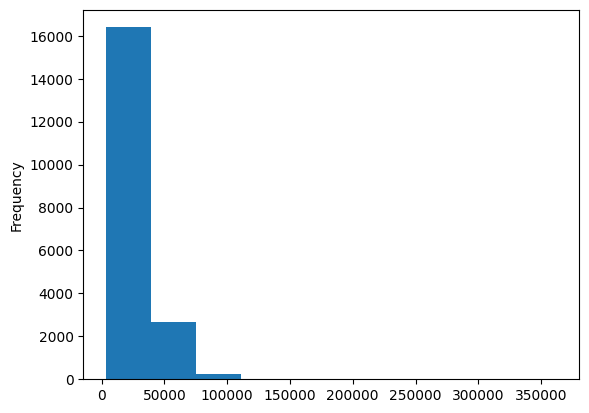

In [51]:
df_womissing['total_income'].plot(kind='hist')

The missing values should be replaced with the median because the dataset has signicant outliers in it.

In [52]:
len(df_credit['total_income'])

21453

In [53]:
df_credit['total_income'].isna().sum()

2102

In [54]:
#  Write a function that we will use for filling in missing values
median_income = df_credit.groupby(['income_type', 'age_group'])['total_income'].transform('median')
df_credit['total_income'] = df_credit['total_income'].fillna(median_income)

In [55]:
# Check if it works
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21453 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21453 non-null  int64  
 3   education         21453 non-null  object 
 4   education_id      21453 non-null  int64  
 5   family_status     21453 non-null  object 
 6   family_status_id  21453 non-null  int64  
 7   gender            21453 non-null  object 
 8   income_type       21453 non-null  object 
 9   debt              21453 non-null  int64  
 10  total_income      21452 non-null  float64
 11  purpose           21453 non-null  object 
 12  years_employed    19351 non-null  float64
 13  age_group         21453 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 2.3+ MB


In [56]:
# Check if we got any errors
df_credit[df_credit['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_group
5931,0,NaN,58,bachelor's degree,0,married,0,M,entrepreneur,0,NaN,buy residential real estate,NaN,late middle age


In [57]:
#filling remaining NaN values with median of the entire dataset
median_income = df_credit['total_income'].median()
df_credit[df_credit['total_income'].isna()]['income_type'].fillna(median_income)

5931    entrepreneur
Name: income_type, dtype: object

In [58]:
df_credit['total_income'].fillna(median_income,inplace=True)

Below the total number of entries in the 'total_income' column is verifed with the rest of the dataset.

In [59]:
# Checking the number of entries in the columns
len(df_credit['total_income'].index)==len(df_credit.index)

True

###  Restoring values in `days_employed` <div id='days'></div>

The 'days_employed' column has missing data in it is. The column will be analyesed seeing if the missing values should be replaced wiht the mean or median of the column.

In [60]:
# Distribution of `days_employed` medians based on your identified parameters
median_days = df_credit['days_employed'].median().round()
print(median_days)

2186.0


In [61]:
# Distribution of `days_employed` means based on your identified parameters
mean_days = df_credit['days_employed'].mean().round()
print(mean_days)

4634.0


count    19351.000000
mean      4633.577339
std       5359.543587
min          4.540293
25%        917.311818
50%       2186.150525
75%       5532.532133
max      18388.949901
Name: days_employed, dtype: float64

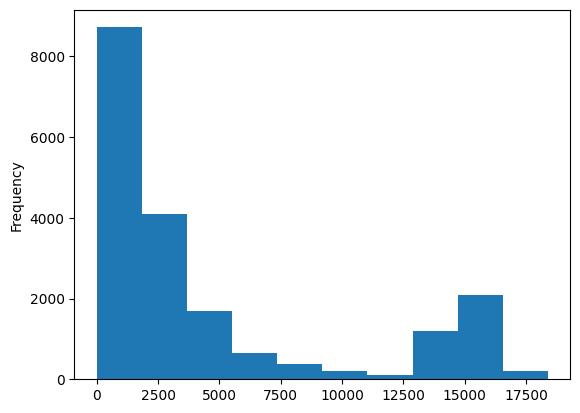

In [62]:
df_credit['days_employed'].plot(kind='hist')
df_credit['days_employed'].describe()

The missing values should be replaced with the median because the dataset has signicant outliers in it.

In [63]:
# Let's write a function that calculates means or medians (depending on your decision) based on your identified parameter
median = df_credit.groupby(['income_type', 'age_group'])['days_employed'].transform('median')
df_credit['days_employed'] = df_credit['days_employed'].fillna(median) 

In [64]:
# Check that the function works
df_credit[df_credit['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_group
5931,0,NaN,58,bachelor's degree,0,married,0,M,entrepreneur,0,23126.962,buy residential real estate,NaN,late middle age


In [65]:
#filling remaining NaN values with median of the entire dataset
median_days = df_credit['days_employed'].median()
df_credit[df_credit['days_employed'].isna()]['days_employed'].fillna(median_days)

5931    2105.008163
Name: days_employed, dtype: float64

In [66]:
df_credit['days_employed'].fillna(median_days,inplace=True)

In [67]:
df_credit[df_credit['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_group


Below the total number of entries in the 'days_employed' column is verifed with the rest of the dataset.

In [68]:
# Check the entries in all columns - make sure we fixed all missing values
len(df_credit['days_employed'].index)==len(df_credit.index)

True

It makes sense to have the same amount of rows for both the 'days_employed' and the 'total_income' column as NaN. As both retirees and entrepreneurs do not have fixed working days nor do they know exactly how much they earn as for retirees how much they earn is dependent on their pension fund and for the entreprenuer it depends on how his/her business performs.

## Categorization of data <div id='cat'></div>

Below the columns that will be used to answer the questions for the analysis are grouped together to get an aoverall view of the dataset that we will be working with to test the hypothesis.

In [69]:
# Print the values for your selected data for categorization
display(df_credit[['children','family_status','debt','income_type','total_income','purpose']])

,children,family_status,debt,income_type,total_income,purpose
0,1,married,0,employee,40620.102,purchase of the house
1,1,married,0,employee,17932.802,car purchase
2,0,married,0,employee,23341.752,purchase of the house
3,3,married,0,employee,42820.568,supplementary education
4,0,civil partnership,0,retiree,25378.572,to have a wedding
...,...,...,...,...,...,...
21448,1,civil partnership,0,business,35966.698,housing transactions
21449,0,married,0,retiree,24959.969,purchase of a car
21450,1,civil partnership,1,employee,14347.610,property
21451,3,married,1,employee,39054.888,buying my own car


The 'purpose' column has various entries so the unique values will be sorted below to see if there are any patterns to the entries.

In [70]:
# Check the unique values
df_credit['purpose'].value_counts()

purpose
wedding ceremony                            791
having a wedding                            767
to have a wedding                           765
real estate transactions                    675
buy commercial real estate                  661
housing transactions                        652
buying property for renting out             651
transactions with commercial real estate    650
purchase of the house                       646
housing                                     646
purchase of the house for my family         638
construction of own property                635
property                                    633
transactions with my real estate            627
building a real estate                      624
buy real estate                             621
purchase of my own house                    620
building a property                         619
housing renovation                          607
buy residential real estate                 606
buying my own car               

From the 'purpose' column there appears to be four groups that people get a loan to finance. These are a wedding,real estate, car or education.

Below the 'purpose' column will be simplified and categorized according to these four groups.

In [71]:
# Let's write a function to categorize the data based on common topics
def purpose_filter(purpose):
    
    if 'wedding' in purpose:
        return 'wedding'
    elif ('real estate' or 'property' or 'housing' or 'house') in purpose:
        return 'real estate'
    elif 'car' in purpose:
        return 'car'
    else:
        return 'education'

In [72]:
# Create a column with the categories and count the values for them
df_credit['purpose'] = df_credit['purpose'].apply(purpose_filter)
df_credit['purpose'].value_counts()

purpose
education      10360
real estate     4464
car             4306
wedding         2323
Name: count, dtype: int64

In [73]:
len(df_credit['purpose'].index)

21453

Below the entire dataset is displayed to see which numerical column should be categorized and it is seen that the 'total_income' column has to be categorized according to what people earn.

In [74]:
# Looking through all the numerical data in your selected column for categorization
display(df_credit)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_group
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,education,23.116912,middle age
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car,11.026860,middle age
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,education,15.406637,young adult
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,education,11.300677,young adult
4,0,14177.753002,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,wedding,932.235814,late middle age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21448,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,education,12.409087,middle age
21449,0,14330.725172,67,secondary education,1,married,0,F,retiree,0,24959.969,car,942.294258,late adulthood
21450,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,education,5.789991,middle age
21451,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,car,8.527347,middle age


,children,debt,total_income
count,21453.000000,21453.000000,21453.000000
mean,0.480585,0.081154,26453.260015
std,0.756079,0.273078,15707.001102
min,0.000000,0.000000,3306.762000
25%,0.000000,0.000000,17210.289000
50%,0.000000,0.000000,23126.962000
75%,1.000000,0.000000,31331.009000
max,5.000000,1.000000,362496.645000


<Axes: ylabel='Frequency'>

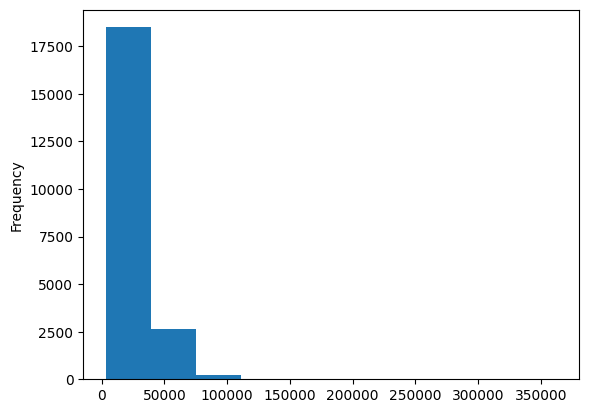

In [75]:
# Getting summary statistics for the column
display(df_credit[['children','debt','total_income','purpose']].describe())
df_credit['total_income'].plot(kind='hist')

To categorize the 'total_income' column, the following groups will be formed. The low earners, average earners and high earners. These will be split according the first percentile and third percentile of the 'total_income' data. Where the first percentile divides the low earners and the average earners, and the third percentile dividing the average earners and the high earners.

In [76]:
# Creating function for categorizing into different numerical groups based on ranges
def income_level(income):
    if income <= 17300:
        return 'low earner'
    elif 17300 < income <= 31400:
        return 'average earner'
    else:
        return 'high earner'


In [77]:
# Creating column with categories
df_credit['income_level'] = df_credit['total_income'].apply(income_level)

In [78]:
# Count each categories values to see the distribution
low = df_credit['income_level'][df_credit['income_level']=='low earner'].count()
print(f'low earner: {low}')

average = df_credit['income_level'][df_credit['income_level']=='average earner'].count()
print(f'average earner: {average}')

high = df_credit['income_level'][df_credit['income_level']=='high earner'].count()
print(f'high earner: {high}')


low earner: 5430
average earner: 10698
high earner: 5325


## Checking the Hypotheses <div id='hyp'></div>


**Is there a correlation between having children and paying back on time?** <div id='h1'></div>

In [79]:
# Check the children data and paying back on time
have_child = len(df_credit['children'][df_credit['children']>0][default['yes']].index)
total_default = len(df_credit['children'][df_credit['children']>0])

# Calculating default-rate based on the number of children
dr_children = (have_child/total_default)*100
print(f'{dr_children}%')

9.208203178052424%


In [80]:
 df_credit.pivot_table(index='children', values='debt', aggfunc='mean')

,debt
children,
0,0.075444
1,0.091658
2,0.094925
3,0.081818
4,0.097561
5,0.000000


**Conclusion**

There is a weak correlation between a client having children and not paying back their loan on time. In comparison to the clients with children, clients with no children are less likely to default on their loans. So we can conclude that have children increases the chances of a client defaulting on their loan. The analysis shows that clients with 5 children do not default on their loan. This could be due to not having enough data on clients with 5 children and the few that are on the dataset have not default on their loan.

**Is there a correlation between family status and paying back on time?** <div id='h2'></div>

In [81]:
# Check the family status data and paying back on time
together = len(df_credit['family_status'][(fam_id[0])|(fam_id[1])][default['yes']].index)
total_default = len(df_credit['family_status'][fam_id[0]|fam_id[1]]) 


# Calculating default-rate based on family status
dr_not_single = (together/total_default)*100
print(f'{dr_not_single}%')

7.999272242100794%


In [82]:
 df_credit.pivot_table(index='family_status', values='debt', aggfunc='mean')

,debt
family_status,
civil partnership,0.093494
divorced,0.071130
married,0.075452
unmarried,0.097509
widow / widower,0.065693


**Conclusion**

There is a weak correlation of a client being in a relationship and not paying back their loan on time. However the data shows that clients that are in a civil partnership or are unmarried are likely to default on their loans than the other clients. The data also shows that a widow or widower are the least likey to default on a loan.

**Is there a correlation between income level and paying back on time?** <div id='h3'></div>

In [83]:
# Check the income level data and paying back on time
low_level = len(df_credit['income_level'][df_credit['income_level']=='low earner'][default['yes']].index)
average_level = len(df_credit['income_level'][df_credit['income_level']=='average earner'][default['yes']].index)
high_level = len(df_credit['income_level'][df_credit['income_level']=='high earner'][default['yes']].index)
total_default_low = len(df_credit['income_level'][df_credit['income_level']=='low earner']) 
total_default_avg = len(df_credit['income_level'][df_credit['income_level']=='average earner'])
total_default_high = len(df_credit['income_level'][df_credit['income_level']=='high earner'])

# Calculating default-rate based on income level
per_low = low_level/total_default_low*100
per_average = average_level/total_default_avg*100
per_high = high_level/total_default_high*100

print(f'default-rate for low level earners {per_low}%\ndefault-rate for average level earners {per_average}%\ndefault-rate for high level earners {per_high}%'
)


default-rate for low level earners 7.974217311233886%
default-rate for average level earners 8.693213684800897%
default-rate for high level earners 7.098591549295774%


In [84]:
 df_credit.pivot_table(index='income_level', values='debt', aggfunc='mean')

,debt
income_level,
average earner,0.086932
high earner,0.070986
low earner,0.079742


**Conclusion**

There is a weak correlation between clients' income level and them not paying back their loans on time. However, amongst the different levels, average and low earners are more likely not to pay back their loans on time in comparison to the high level earners.

**How does credit purpose affect the default rate?** <div id='h4'></div>

In [85]:
# Check the percentages for default rate for each credit purpose and analyze them
education = len(df_credit['purpose'][df_credit['purpose']=='education'][default['yes']].index)
real_estate = len(df_credit['purpose'][df_credit['purpose']=='real estate'][default['yes']].index)
car = len(df_credit['purpose'][df_credit['purpose']=='car'][default['yes']].index)
wedding = len(df_credit['purpose'][df_credit['purpose']=='wedding'][default['yes']].index)
total_edu = len(df_credit['purpose'][df_credit['purpose']=='education'])
total_real = len(df_credit['purpose'][df_credit['purpose']=='real estate'])
total_car = len(df_credit['purpose'][df_credit['purpose']=='car'])
total_wed = len(df_credit['purpose'][df_credit['purpose']=='wedding'])

per_edu = education/total_edu*100
per_real = real_estate/total_real*100
per_car = car/total_car*100
per_wed = wedding/total_wed*100

print(f'default-rate on loan for education purposes: {per_edu}%\ndefault-rate on loan for real estate purposes: {per_real}%\ndefault-rate on loan for car purposes: {per_car}%\ndefault-rate on loan for wedding purposes: {per_wed}%'
)

default-rate on loan for education purposes: 7.876447876447877%
default-rate on loan for real estate purposes: 7.526881720430108%
default-rate on loan for car purposes: 9.359033906177427%
default-rate on loan for wedding purposes: 8.006887645286268%


In [86]:
 df_credit.pivot_table(index='purpose', values='debt', aggfunc='mean')

,debt
purpose,
car,0.093590
education,0.078764
real estate,0.075269
wedding,0.080069


**Conclusion**

There is a weak correlation between between the clients purpose for the loan and them not paying the loan on time. However amongst the different purposes it is more likely for clients who take out a loan for car purposes to not pay back their loan on time. 

# General Conclusion <div id='end'></div>

In the dataset there were duplicates that were removed from the dataset. They formed a very small percentage of the dataset. There are missing values in the 'total_income' and 'days_employed' columns. These values were replaced with the mean and median, respactively, after analysis of the distribution of each column. There were negetive values in the 'children' and 'days_employed' column. These values were made positive as it was assumed that the errors were just data entry errors. In the 'days_employed' column there were values that were very large and unrealistic so it was possible that these values were the hours worked so these values were converted to days. 

To answer the main question there is a weak correlation between a client having kids and them paying their loan late. There is  a weak correlation between clients being in a relationship and them not paying back their loan on time. There is also a weak corelation between a clients income level and purpose of the loan to them not paying back their loan on time, but it is seen that clients who earn more are less likey to default on a loan compared to the average and low earners. 